![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/1.SparkNLP_Basics.ipynb)

# Spark NLP Basics and Pretrained Pipelines

## 0. Colab Setup

In [1]:
import os

# Install java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed -q pyspark==2.4.4
! pip install --ignore-installed -q spark-nlp==2.5.4

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
     |████████████████████████████████| 215.7MB 55kB/s 
     |████████████████████████████████| 204kB 44.1MB/s 
     |████████████████████████████████| 133kB 3.5MB/s 



#### **How to prevent Google Colab from disconnecting?**

Google Colab notebooks have an idle timeout of 90 minutes and absolute timeout of 12 hours. This means, if user does not interact with his Google Colab notebook for more than 90 minutes, its instance is automatically terminated. Also, maximum lifetime of a Colab instance is **12 hours.**

Set a javascript interval to click on the connect button every 60 seconds. Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on the console prompt. (for mac press Option+Command+I)



In [ ]:
''' 

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

'''

## 1. Start Spark Session

In [2]:
import sparknlp

spark = sparknlp.start()

# params =>> gpu=False, spark23=False

print("Spark NLP version", sparknlp.version())

print("Apache Spark version:", spark.version)


Spark NLP version 2.5.4
Apache Spark version: 2.4.4


`sparknlp.start()` will start or get SparkSession with predefined parameters hardcoded in `spark-nlp/python/sparknlp/__init__.py`. here is what is going on under the hood when you run `sparknlp.start()` 

In [ ]:
# https://github.com/JohnSnowLabs/spark-nlp/blob/master/python/sparknlp/__init__.py

from pyspark.sql import SparkSession

def start(gpu=False, spark23=False):
    current_version="2.5.4"
    maven_spark24 = "com.johnsnowlabs.nlp:spark-nlp_2.11:{}".format(current_version)
    maven_gpu_spark24 = "com.johnsnowlabs.nlp:spark-nlp-gpu_2.11:{}".format(current_version)
    maven_spark23 = "com.johnsnowlabs.nlp:spark-nlp-spark23_2.11:{}".format(current_version)
    maven_gpu_spark23 = "com.johnsnowlabs.nlp:spark-nlp-gpu-spark23_2.11:{}".format(current_version)

    builder = SparkSession.builder \
        .appName("Spark NLP") \
        .master("local[*]") \
        .config("spark.driver.memory", "16G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "1000M") \
        .config("spark.driver.maxResultSize", "0")
    if gpu and spark23:
        builder.config("spark.jars.packages", maven_gpu_spark23)
    elif spark23:
        builder.config("spark.jars.packages", maven_spark23)
    elif gpu:
        builder.config("spark.jars.packages", maven_gpu_spark24)
    else:
        builder.config("spark.jars.packages", maven_spark24)
        
    return builder.getOrCreate()


If you want to start `SparkSession` with your own parameters or you need to load the required jars/packages from your local disk, or you have no internet connection (that would be needed to pull the required packages from internet), you can skip `sparknlp.start()` and start your session manually as shown below.


In [ ]:
"""
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spark NLP Enterprise 2.4.5") \
    .master("local[8]") \
    .config("spark.driver.memory","12G") \
    .config("spark.driver.maxResultSize", "2G") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer.max", "800M")\
    .config("spark.jars", "{}spark-nlp-2.4.5.jar,{}spark-nlp-jsl-2.4.5.jar".format(jar_path,jar_path)) \
    .getOrCreate()
    
"""

CPU on Apache Spark 2.4.x: https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/spark-nlp-assembly-2.5.4.jar

GPU on Apache Spark 2.4.x: https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/spark-nlp-gpu-assembly-2.5.4.jar

CPU on Apache Spark 2.3.x: https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/spark-nlp-spark23-assembly-2.5.4.jar

GPU on Apache Spark 2.3.x: https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/spark-nlp-spark23-gpu-assembly-2.5.4.jar

## 2. Using Pretrained Pipelines

https://github.com/JohnSnowLabs/spark-nlp-models

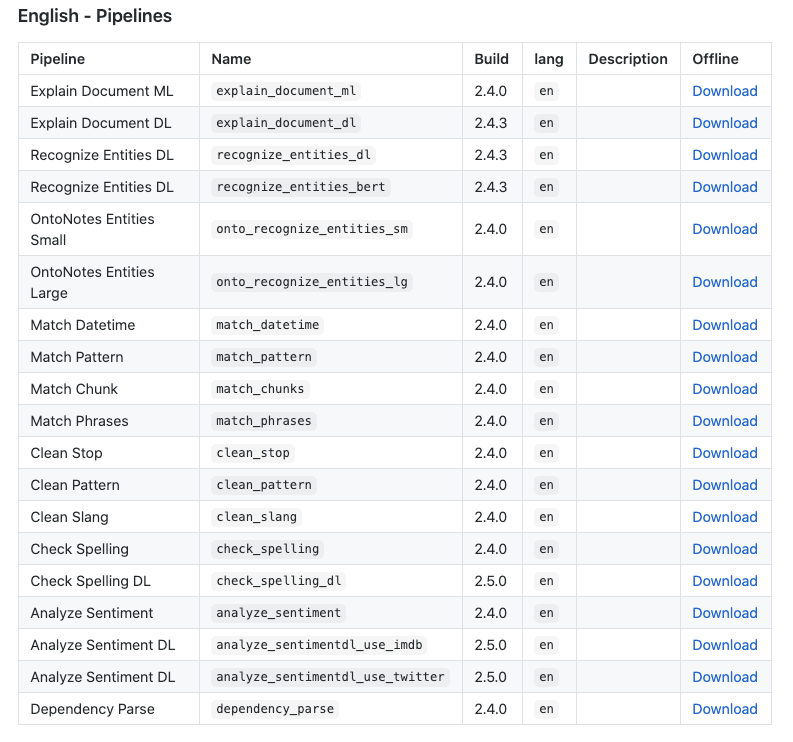

In [4]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

### Explain Document ML

**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- Lemmatizer
- Stemmer
- Part of Speech
- SpellChecker (Norvig)




In [ ]:
pipeline = PretrainedPipeline('explain_document_ml', lang='en')


explain_document_ml download started this may take some time.
Approx size to download 9.4 MB
[OK!]


In [ ]:
# Load pretrained pipeline from local disk:

pipeline_local = PretrainedPipeline.from_disk('/root/cache_pretrained/explain_document_ml_en_2.4.0_2.4_1580252705962')

In [ ]:
%%time

result = pipeline.annotate(testDoc)

CPU times: user 40.9 ms, sys: 14.8 ms, total: 55.7 ms
Wall time: 1.25 s


In [ ]:
result.keys()

dict_keys(['document', 'spell', 'pos', 'lemmas', 'token', 'stems', 'sentence'])

In [ ]:
result['sentence']

['Peter is a very good persn.',
 'My life in Russia is very intersting.',
 'John and Peter are brothrs.',
 "However they don't support each other that much.",
 'Lucas Nogal Dunbercker is no longer happy.',
 'He has a good car though.',
 'Europe is very culture rich.',
 'There are huge churches!',
 'and big houses!']

In [ ]:
result['token']

['Peter',
 'is',
 'a',
 'very',
 'good',
 'persn',
 '.',
 'My',
 'life',
 'in',
 'Russia',
 'is',
 'very',
 'intersting',
 '.',
 'John',
 'and',
 'Peter',
 'are',
 'brothrs',
 '.',
 'However',
 'they',
 "don't",
 'support',
 'each',
 'other',
 'that',
 'much',
 '.',
 'Lucas',
 'Nogal',
 'Dunbercker',
 'is',
 'no',
 'longer',
 'happy',
 '.',
 'He',
 'has',
 'a',
 'good',
 'car',
 'though',
 '.',
 'Europe',
 'is',
 'very',
 'culture',
 'rich',
 '.',
 'There',
 'are',
 'huge',
 'churches',
 '!',
 'and',
 'big',
 'houses',
 '!']

In [ ]:
list(zip(result['token'], result['pos']))

[('Peter', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('persn', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('life', 'NN'),
 ('in', 'IN'),
 ('Russia', 'NNP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('intersting', 'JJ'),
 ('.', '.'),
 ('John', 'NNP'),
 ('and', 'CC'),
 ('Peter', 'NNP'),
 ('are', 'VBP'),
 ('brothrs', 'NNS'),
 ('.', '.'),
 ('However', 'RB'),
 ('they', 'PRP'),
 ("don't", 'VBP'),
 ('support', 'VB'),
 ('each', 'DT'),
 ('other', 'JJ'),
 ('that', 'IN'),
 ('much', 'JJ'),
 ('.', '.'),
 ('Lucas', 'NNP'),
 ('Nogal', 'NNP'),
 ('Dunbercker', 'NNP'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('longer', 'RB'),
 ('happy', 'JJ'),
 ('.', '.'),
 ('He', 'PRP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('car', 'NN'),
 ('though', 'IN'),
 ('.', '.'),
 ('Europe', 'NNP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('culture', 'RB'),
 ('rich', 'JJ'),
 ('.', '.'),
 ('There', 'EX'),
 ('are', 'VBP'),
 ('huge', 'JJ'),
 ('churches', 'NNS'),
 ('!', '.'),
 ('and', 'CC'),
 ('big', 'JJ'),
 ('house

In [ ]:
list(zip(result['token'], result['lemmas'], result['stems'], result['spell']))

[('Peter', 'Peter', 'peter', 'Peter'),
 ('is', 'be', 'i', 'is'),
 ('a', 'a', 'a', 'a'),
 ('very', 'very', 'veri', 'very'),
 ('good', 'good', 'good', 'good'),
 ('persn', 'person', 'person', 'person'),
 ('.', '.', '.', '.'),
 ('My', 'My', 'my', 'My'),
 ('life', 'life', 'life', 'life'),
 ('in', 'in', 'in', 'in'),
 ('Russia', 'Russia', 'russia', 'Russia'),
 ('is', 'be', 'i', 'is'),
 ('very', 'very', 'veri', 'very'),
 ('intersting', 'interest', 'interest', 'interesting'),
 ('.', '.', '.', '.'),
 ('John', 'John', 'john', 'John'),
 ('and', 'and', 'and', 'and'),
 ('Peter', 'Peter', 'peter', 'Peter'),
 ('are', 'be', 'ar', 'are'),
 ('brothrs', 'broth', 'broth', 'broths'),
 ('.', '.', '.', '.'),
 ('However', 'However', 'howev', 'However'),
 ('they', 'they', 'thei', 'they'),
 ("don't", "don't", "don't", "don't"),
 ('support', 'support', 'support', 'support'),
 ('each', 'each', 'each', 'each'),
 ('other', 'other', 'other', 'other'),
 ('that', 'that', 'that', 'that'),
 ('much', 'much', 'much', 'much

In [ ]:
import pandas as pd

df = pd.DataFrame({'token':result['token'], 
                      'corrected':result['spell'], 'POS':result['pos'],
                      'lemmas':result['lemmas'], 'stems':result['stems']})
df

token    corrected   POS      lemmas     stems
0        Peter        Peter   NNP       Peter     peter
1           is           is   VBZ          be         i
2            a            a    DT           a         a
3         very         very    RB        very      veri
4         good         good    JJ        good      good
5        persn       person    NN      person    person
6            .            .     .           .         .
7           My           My  PRP$          My        my
8         life         life    NN        life      life
9           in           in    IN          in        in
10      Russia       Russia   NNP      Russia    russia
11          is           is   VBZ          be         i
12        very         very    RB        very      veri
13  intersting  interesting    JJ    interest  interest
14           .            .     .           .         .
15        John         John   NNP        John      john
16         and          and    CC         and       and
17       Peter        Peter   NNP       Peter     peter
18         are          are   VBP          be        ar
19     brothrs       broths   NNS       broth     broth
20           .            .     .           .         .
21     However      However    RB     However     howev
22        they         they   PRP        they      thei
23       don't        don't   VBP       don't     don't
24     support      support    VB     support   support
25        each         each    DT        each      each
26       other        other    JJ       other     other
27        that         that    IN        that      that
28        much         much    JJ        much      much
29           .            .     .           .         .
30       Lucas        Lucas   NNP       Lucas      luca
31       Nogal        Nogal   NNP       Nogal     nogal
32  Dunbercker   Dunbercker   NNP  Dunbercker  dunberck
33          is           is   VBZ          be         i
34          no           no    DT          no        no
35      longer       longer    RB        long    longer
36       happy        happy    JJ       happy     happi
37           .            .     .           .         .
38          He           He   PRP          He        he
39         has          has   VBZ        have        ha
40           a            a    DT           a         a
41        good         good    JJ        good      good
42         car          car    NN         car       car
43      though       though    IN      though    though
44           .            .     .           .         .
45      Europe       Europe   NNP      Europe     europ
46          is           is   VBZ          be         i
47        very         very    RB        very      veri
48     culture      culture    RB     culture    cultur
49        rich         rich    JJ        rich      rich
50           .            .     .           .         .
51       There        There    EX       There     there
52         are          are   VBP          be        ar
53        huge         huge    JJ        huge      huge
54    churches     churches   NNS      church    church
55           !            !     .           !         !
56         and          and    CC         and       and
57         big          big    JJ         big       big
58      houses       houses   NNS       house      hous
59           !            !     .           !         !

### Explain Document DL

**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- NER (NER with GloVe 100D embeddings, CoNLL2003 dataset)
- Lemmatizer
- Stemmer
- Part of Speech
- SpellChecker (Norvig)


In [ ]:
pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')


explain_document_dl download started this may take some time.
Approx size to download 168.4 MB
[OK!]


In [ ]:
%%time

result = pipeline_dl.annotate(testDoc)

result.keys()

CPU times: user 47.2 ms, sys: 20.4 ms, total: 67.6 ms
Wall time: 1.37 s


In [ ]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
result['entities']

['Peter', 'Russia', 'John', 'Peter', 'Lucas Nogal Dunbercker', 'Europe']

In [ ]:
df = pd.DataFrame({'token':result['token'], 'ner_label':result['ner'],
                      'spell_corrected':result['checked'], 'POS':result['pos'],
                      'lemmas':result['lemma'], 'stems':result['stem']})

df

token ner_label spell_corrected   POS      lemmas     stems
0        Peter     B-PER           Peter   NNP       Peter     peter
1           is         O              is   VBZ          be         i
2            a         O               a    DT           a         a
3         very         O            very    RB        very      veri
4         good         O            good    JJ        good      good
5        persn         O          person    NN      person    person
6            .         O               .     .           .         .
7           My         O              My  PRP$          My        my
8         life         O            life    NN        life      life
9           in         O              in    IN          in        in
10      Russia     B-LOC          Russia   NNP      Russia    russia
11          is         O              is   VBZ          be         i
12        very         O            very    RB        very      veri
13  intersting         O     interesting    JJ    interest  interest
14           .         O               .     .           .         .
15        John     B-PER            John   NNP        John      john
16         and         O             and    CC         and       and
17       Peter     B-PER           Peter   NNP       Peter     peter
18         are         O             are   VBP          be        ar
19     brothrs         O          broths   NNS       broth     broth
20           .         O               .     .           .         .
21     However         O         However    RB     However     howev
22        they         O            they   PRP        they      thei
23       don't         O           don't   VBP       don't     don't
24     support         O         support    VB     support   support
25        each         O            each    DT        each      each
26       other         O           other    JJ       other     other
27        that         O            that    IN        that      that
28        much         O            much    JJ        much      much
29           .         O               .     .           .         .
30       Lucas     B-ORG           Lucas   NNP       Lucas      luca
31       Nogal     I-ORG           Nogal   NNP       Nogal     nogal
32  Dunbercker     I-ORG      Dunbercker   NNP  Dunbercker  dunberck
33          is         O              is   VBZ          be         i
34          no         O              no    DT          no        no
35      longer         O          longer    RB        long    longer
36       happy         O           happy    JJ       happy     happi
37           .         O               .     .           .         .
38          He         O              He   PRP          He        he
39         has         O             has   VBZ        have        ha
40           a         O               a    DT           a         a
41        good         O            good    JJ        good      good
42         car         O             car    NN         car       car
43      though         O          though    IN      though    though
44           .         O               .     .           .         .
45      Europe     B-LOC          Europe   NNP      Europe     europ
46          is         O              is   VBZ          be         i
47        very         O            very    RB        very      veri
48     culture         O         culture    RB     culture    cultur
49        rich         O            rich    JJ        rich      rich
50           .         O               .     .           .         .
51       There         O           There    EX       There     there
52         are         O             are   VBP          be        ar
53        huge         O            huge    JJ        huge      huge
54    churches         O        churches   NNS      church    church
55           !         O               !     .           !         !
56         and         O             and    CC         and       and
57     

### Recognize Entities DL

In [5]:
recognize_entities = PretrainedPipeline('recognize_entities_dl', lang='en')


recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]


In [7]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = recognize_entities.annotate(testDoc)

list(zip(result['token'], result['ner']))

[('Peter', 'B-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('very', 'O'),
 ('good', 'O'),
 ('persn', 'O'),
 ('.', 'O'),
 ('My', 'O'),
 ('life', 'O'),
 ('in', 'O'),
 ('Russia', 'B-LOC'),
 ('is', 'O'),
 ('very', 'O'),
 ('intersting', 'O'),
 ('.', 'O'),
 ('John', 'B-PER'),
 ('and', 'O'),
 ('Peter', 'B-PER'),
 ('are', 'O'),
 ('brothrs', 'O'),
 ('.', 'O'),
 ('However', 'O'),
 ('they', 'O'),
 ("don't", 'O'),
 ('support', 'O'),
 ('each', 'O'),
 ('other', 'O'),
 ('that', 'O'),
 ('much', 'O'),
 ('.', 'O'),
 ('Lucas', 'B-ORG'),
 ('Nogal', 'I-ORG'),
 ('Dunbercker', 'I-ORG'),
 ('is', 'O'),
 ('no', 'O'),
 ('longer', 'O'),
 ('happy', 'O'),
 ('.', 'O'),
 ('He', 'O'),
 ('has', 'O'),
 ('a', 'O'),
 ('good', 'O'),
 ('car', 'O'),
 ('though', 'O'),
 ('.', 'O'),
 ('Europe', 'B-LOC'),
 ('is', 'O'),
 ('very', 'O'),
 ('culture', 'O'),
 ('rich', 'O'),
 ('.', 'O'),
 ('There', 'O'),
 ('are', 'O'),
 ('huge', 'O'),
 ('churches', 'O'),
 ('!', 'O'),
 ('and', 'O'),
 ('big', 'O'),
 ('houses', 'O'),
 ('!', 'O')]

### Clean Stop Words

In [8]:
clean_stop = PretrainedPipeline('clean_stop', lang='en')


clean_stop download started this may take some time.
Approx size to download 12.4 KB
[OK!]


In [12]:

result = clean_stop.annotate(testDoc)

' '.join(result['cleanTokens'])

"Peter good persn . life Russia intersting . John Peter brothrs . don't support . Lucas Nogal Dunbercker longer happy . good car . Europe culture rich . huge churches ! big houses !"

### Clean Slang 

In [19]:
clean_slang = PretrainedPipeline('clean_slang', lang='en')

result = clean_slang.annotate(' Whatsup bro, call me ASAP')

' '.join(result['normal'])

clean_slang download started this may take some time.
Approx size to download 21.8 KB
[OK!]


'how are you friend call me as soon as possible'

### Spell Checker 

(Norvig Algo)

In [ ]:
spell_checker = PretrainedPipeline('check_spelling', lang='en')


check_spelling download started this may take some time.
Approx size to download 892.6 KB
[OK!]


In [ ]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = spell_checker.annotate(testDoc)

result.keys()

dict_keys(['document', 'sentence', 'token', 'checked'])

In [ ]:
list(zip(result['token'], result['checked']))

[('Peter', 'Peter'),
 ('is', 'is'),
 ('a', 'a'),
 ('very', 'very'),
 ('good', 'good'),
 ('persn', 'person'),
 ('.', '.'),
 ('My', 'My'),
 ('life', 'life'),
 ('in', 'in'),
 ('Russia', 'Russia'),
 ('is', 'is'),
 ('very', 'very'),
 ('intersting', 'interesting'),
 ('.', '.'),
 ('John', 'John'),
 ('and', 'and'),
 ('Peter', 'Peter'),
 ('are', 'are'),
 ('brothrs', 'brothers'),
 ('.', '.'),
 ('However', 'However'),
 ('they', 'they'),
 ("don't", "don't"),
 ('support', 'support'),
 ('each', 'each'),
 ('other', 'other'),
 ('that', 'that'),
 ('much', 'much'),
 ('.', '.'),
 ('Lucas', 'Lucas'),
 ('Nogal', 'Nigel'),
 ('Dunbercker', 'Dunbercker'),
 ('is', 'is'),
 ('no', 'no'),
 ('longer', 'longer'),
 ('happy', 'happy'),
 ('.', '.'),
 ('He', 'He'),
 ('has', 'has'),
 ('a', 'a'),
 ('good', 'good'),
 ('car', 'car'),
 ('though', 'though'),
 ('.', '.'),
 ('Europe', 'Europe'),
 ('is', 'is'),
 ('very', 'very'),
 ('culture', 'culture'),
 ('rich', 'rich'),
 ('.', '.'),
 ('There', 'There'),
 ('are', 'are'),
 ('h

### Spell Checker DL

https://medium.com/spark-nlp/applying-context-aware-spell-checking-in-spark-nlp-3c29c46963bc

In [ ]:
spell_checker_dl = PretrainedPipeline('check_spelling_dl', lang='en')


check_spelling_dl download started this may take some time.
Approx size to download 112.1 MB
[OK!]


In [ ]:
text = 'We will go to swimming if the ueather is nice.'

result = spell_checker_dl.annotate(text)

list(zip(result['token'], result['checked']))

[('We', 'We'),
 ('will', 'will'),
 ('go', 'go'),
 ('to', 'to'),
 ('swimming', 'swimming'),
 ('if', 'if'),
 ('the', 'the'),
 ('ueather', 'weather'),
 ('is', 'is'),
 ('nice', 'nice'),
 ('.', '.')]

In [ ]:
result.keys()

dict_keys(['document', 'sentence', 'token', 'checked'])

In [ ]:
# check for the different occurrences of the word "ueather"
examples = ['We will go to swimming if the ueather is nice.',\
    "I have a black ueather jacket, so nice.",\
    "I introduce you to my sister, she is called ueather."]

results = spell_checker_dl.annotate(examples)

for result in results:
  print (list(zip(result['token'], result['checked'])))

[('We', 'We'), ('will', 'will'), ('go', 'go'), ('to', 'to'), ('swimming', 'swimming'), ('if', 'if'), ('the', 'the'), ('ueather', 'weather'), ('is', 'is'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('have', 'have'), ('a', 'a'), ('black', 'black'), ('ueather', 'leather'), ('jacket', 'jacket'), (',', ','), ('so', 'so'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('introduce', 'introduce'), ('you', 'you'), ('to', 'to'), ('my', 'my'), ('sister', 'sister'), (',', ','), ('she', 'she'), ('is', 'is'), ('called', 'called'), ('ueather', 'Heather'), ('.', '.')]


In [ ]:
for result in results:
  print (result['document'],'>>',[pairs for pairs in list(zip(result['token'], result['checked'])) if pairs[0]!=pairs[1]])

['We will go to swimming if the ueather is nice.'] >> [('ueather', 'weather')]
['I have a black ueather jacket, so nice.'] >> [('ueather', 'leather')]
['I introduce you to my sister, she is called ueather.'] >> [('ueather', 'Heather')]


In [ ]:
# if we had tried the same with spell_checker (previous version)

results = spell_checker.annotate(examples)

for result in results:
  print (list(zip(result['token'], result['checked'])))

[('We', 'We'), ('will', 'will'), ('go', 'go'), ('to', 'to'), ('swimming', 'swimming'), ('if', 'if'), ('the', 'the'), ('ueather', 'weather'), ('is', 'is'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('have', 'have'), ('a', 'a'), ('black', 'black'), ('ueather', 'weather'), ('jacket', 'jacket'), (',', ','), ('so', 'so'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('introduce', 'introduce'), ('you', 'you'), ('to', 'to'), ('my', 'my'), ('sister', 'sister'), (',', ','), ('she', 'she'), ('is', 'is'), ('called', 'called'), ('ueather', 'weather'), ('.', '.')]


### Parsing a list of texts

In [ ]:
testDoc_list = ['French author who helped pioner the science-fiction genre.',
'Verne wrate about space, air, and underwater travel before navigable aircrast',
'Practical submarines were invented, and before any means of space travel had been devised.']

testDoc_list

['French author who helped pioner the science-fiction genre.',
 'Verne wrate about space, air, and underwater travel before navigable aircrast',
 'Practical submarines were invented, and before any means of space travel had been devised.']

In [ ]:
pipeline = PretrainedPipeline('explain_document_ml', lang='en')


In [ ]:
result_list = pipeline.annotate(testDoc_list)

len (result_list)

3

In [ ]:
result_list[0]

{'document': ['French author who helped pioner the science-fiction genre.'],
 'lemmas': ['French',
  'author',
  'who',
  'help',
  'pioneer',
  'the',
  'sciencefiction',
  'genre',
  '.'],
 'pos': ['JJ', 'NN', 'WP', 'VBD', 'NN', 'DT', 'NN', 'NN', '.'],
 'sentence': ['French author who helped pioner the science-fiction genre.'],
 'spell': ['French',
  'author',
  'who',
  'helped',
  'pioneer',
  'the',
  'sciencefiction',
  'genre',
  '.'],
 'stems': ['french',
  'author',
  'who',
  'help',
  'pioneer',
  'the',
  'sciencefict',
  'genr',
  '.'],
 'token': ['French',
  'author',
  'who',
  'helped',
  'pioner',
  'the',
  'science-fiction',
  'genre',
  '.']}

### Using fullAnnotate to get more details



In [ ]:
text = 'Peter Parker is a nice guy and lives in New York'

In [ ]:
# pipeline_dl >> explain_document_dl

detailed_result = pipeline_dl.fullAnnotate(text)

In [ ]:
detailed_result

[{'checked': [Annotation(token, 0, 4, Peter, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 6, 11, Parker, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 13, 14, is, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 16, 16, a, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 18, 21, nice, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 23, 26, guys, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 28, 30, and, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 32, 36, lives, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 38, 39, in, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 41, 43, New, {'confidence': '1.0', 'sentence': '0'}),
   Annotation(token, 45, 48, York, {'confidence': '1.0', 'sentence': '0'})],
  'document': [Annotation(document, 0, 48, Peter Parker is a nice guye and lives in New York, {})],
  'embeddings': [Annotation(word_embeddings, 0, 4, Peter, {'

In [ ]:
detailed_result[0]['entities']

[Annotation(chunk, 0, 11, Peter Parker, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}),
 Annotation(chunk, 40, 47, New York, {'entity': 'LOC', 'sentence': '0', 'chunk': '1'})]

In [ ]:
chunks=[]
entities=[]
for n in detailed_result[0]['entities']:
        
  chunks.append(n.result)
  entities.append(n.metadata['entity']) 
    
df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df    

chunks entities
0  Peter Parker      PER
1      New York      LOC

In [ ]:
tuples = []

for x,y,z in zip(detailed_result[0]["token"], detailed_result[0]["pos"], detailed_result[0]["ner"]):

  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df


sent_id   token  start  end  pos    ner
0         0   Peter      0    4  NNP  B-PER
1         0  Parker      6   11  NNP  I-PER
2         0      is     13   14  VBZ      O
3         0       a     16   16   DT      O
4         0    nice     18   21   JJ      O
5         0     guy     23   25   NN      O
6         0     and     27   29   CC      O
7         0   lives     31   35  NNS      O
8         0      in     37   38   IN      O
9         0     New     40   42  NNP  B-LOC
10        0    York     44   47  NNP  I-LOC

### Use pretrained match_chunk Pipeline for Individual Noun Phrase

**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- Part of Speech
- Chunker

Pipeline:

- The pipeline uses regex `<DT>?<JJ>*<NN>+`
- which states that whenever the chunk finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN) then the Noun Phrase(NP) chunk should be formed.

In [ ]:
pipeline = PretrainedPipeline('match_chunks', lang='en')


match_chunks download started this may take some time.
Approx size to download 4.3 MB
[OK!]


In [ ]:
result = pipeline.annotate("The book has many chapters") # single noun phrase


In [ ]:
result

{'chunk': ['The book'],
 'document': ['The book has many chapters'],
 'pos': ['DT', 'NN', 'VBZ', 'JJ', 'NNS'],
 'sentence': ['The book has many chapters'],
 'token': ['The', 'book', 'has', 'many', 'chapters']}

In [ ]:
result['chunk']

['The book']

In [ ]:
result = pipeline.annotate("the little yellow dog barked at the cat") #multiple noune phrases

In [ ]:
result

{'chunk': ['the little yellow dog', 'the cat'],
 'document': ['the little yellow dog barked at the cat'],
 'pos': ['DT', 'JJ', 'JJ', 'NN', 'JJ', 'IN', 'DT', 'NN'],
 'sentence': ['the little yellow dog barked at the cat'],
 'token': ['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'cat']}

In [ ]:
result['chunk']

['the little yellow dog', 'the cat']

### Extract exact dates from referential date phrases

In [ ]:
pipeline = PretrainedPipeline('match_datetime', lang='en')


match_datetime download started this may take some time.
Approx size to download 12.9 KB
[OK!]


In [ ]:
result = pipeline.annotate("I saw him yesterday and he told me that he will visit us next week")

result

{'date': ['2020/08/02', '2020/07/25'],
 'document': ['I saw him yesterday and he told me that he will visit us next week'],
 'sentence': ['I saw him yesterday and he told me that he will visit us next week'],
 'token': ['I',
  'saw',
  'him',
  'yesterday',
  'and',
  'he',
  'told',
  'me',
  'that',
  'he',
  'will',
  'visit',
  'us',
  'next',
  'week']}

In [ ]:
detailed_result = pipeline.fullAnnotate("I saw him yesterday and he told me that he will visit us next week")

detailed_result

[{'date': [Annotation(date, 57, 65, 2020/08/02, {'sentence': '0'}),
   Annotation(date, 10, 18, 2020/07/25, {'sentence': '0'})],
  'document': [Annotation(document, 0, 65, I saw him yesterday and he told me that he will visit us next week, {})],
  'sentence': [Annotation(document, 0, 65, I saw him yesterday and he told me that he will visit us next week, {'sentence': '0'})],
  'token': [Annotation(token, 0, 0, I, {'sentence': '0'}),
   Annotation(token, 2, 4, saw, {'sentence': '0'}),
   Annotation(token, 6, 8, him, {'sentence': '0'}),
   Annotation(token, 10, 18, yesterday, {'sentence': '0'}),
   Annotation(token, 20, 22, and, {'sentence': '0'}),
   Annotation(token, 24, 25, he, {'sentence': '0'}),
   Annotation(token, 27, 30, told, {'sentence': '0'}),
   Annotation(token, 32, 33, me, {'sentence': '0'}),
   Annotation(token, 35, 38, that, {'sentence': '0'}),
   Annotation(token, 40, 41, he, {'sentence': '0'}),
   Annotation(token, 43, 46, will, {'sentence': '0'}),
   Annotation(token, 

In [ ]:
tuples = []

for x in detailed_result[0]["token"]:

  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end'])

df

sent_id      token  start  end
0         0          I      0    0
1         0        saw      2    4
2         0        him      6    8
3         0  yesterday     10   18
4         0        and     20   22
5         0         he     24   25
6         0       told     27   30
7         0         me     32   33
8         0       that     35   38
9         0         he     40   41
10        0       will     43   46
11        0      visit     48   52
12        0         us     54   55
13        0       next     57   60
14        0       week     62   65

### Sentiment Analysis


#### Vivek algo

In [ ]:
sentiment = PretrainedPipeline('analyze_sentiment', lang='en')

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [ ]:
result = sentiment.annotate("The movie I watched today was not a good one")

result['sentiment']

['negative']

#### DL version (trained on imdb)

In [ ]:
sentiment_imdb = PretrainedPipeline('analyze_sentimentdl_use_imdb', lang='en')

analyze_sentimentdl_use_imdb download started this may take some time.
Approx size to download 935.8 MB
[OK!]


In [ ]:
sentiment_imdb_glove = PretrainedPipeline('analyze_sentimentdl_glove_imdb', lang='en')

analyze_sentimentdl_glove_imdb download started this may take some time.
Approx size to download 154.9 MB
[OK!]


In [ ]:
comment = '''
It's a very scary film but what impressed me was how true the film sticks to the original's tricks; it isn't filled with loud in-your-face jump scares, in fact, a lot of what makes this film scary is the slick cinematography and intricate shadow play. The use of lighting and creation of atmosphere is what makes this film so tense, which is why it's perfectly suited for those who like Horror movies but without the obnoxious gore.
'''
result = sentiment_imdb_glove.annotate(comment)

result['sentiment']

['positive']

In [ ]:
sentiment_imdb_glove.fullAnnotate(comment)[0]['sentiment']

[Annotation(category, 0, 433, positive, {'sentence': '0', 'positive': '0.92505074', 'negative': '0.074949294'})]

#### DL version (trained on twitter dataset)

In [ ]:
sentiment_twitter = PretrainedPipeline('analyze_sentimentdl_use_twitter', lang='en')

analyze_sentimentdl_use_twitter download started this may take some time.
Approx size to download 928.3 MB
[OK!]


In [ ]:
result = sentiment_twitter.annotate("The movie I watched today was not a good one")

result['sentiment']

['negative']